In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  

np.random.seed(42)
movies = ["Inception", "3 idiots", "Avengers", "Titanic", "The Dark Knight", "The Green Mile", "Glory", "Joker", "Gladiator", "Peaky blinders"]
genres = ["Sci-Fi", "Action", "Drama", "Thriller", "Comedy"]
sentiment =['Negative','Positive','Netural']

data = {
    "Movie": np.random.choice(movies, 50),
    "Genre": np.random.choice(genres, 50),
    "Viewer Age": np.random.randint(12, 60, 50),
    "Rating": np.random.uniform(1, 10, 50),
    "Review Count": np.random.randint(50, 5000, 50),
    "Review Sentiment" : np.random.choice(sentiment,50)
}

df = pd.DataFrame(data)
df["Adjusted Rating"] = (df["Rating"] / 2).astype(int).astype(str) + " star"
def age_group(age):
    if age <= 18:
        return "Teenager"
    elif age <= 35:
        return "Young Adult"
    elif age <= 45:
        return "Middle-aged Adult"
    else:
        return "Old Adults"

df["Age Group"] = df["Viewer Age"].apply(age_group)
print(df)



              Movie     Genre  Viewer Age    Rating  Review Count  \
0             Glory     Drama          44  3.660703          3632   
1           Titanic    Sci-Fi          59  1.949448           658   
2             Joker  Thriller          34  5.108811          3322   
3   The Dark Knight    Action          35  2.965964          1197   
4             Glory  Thriller          48  4.748590          4332   
5    Peaky blinders    Action          46  8.949522          3447   
6          Avengers    Action          55  3.919105          2561   
7             Glory  Thriller          51  2.098792          1844   
8             Joker    Comedy          33  4.206681           709   
9   The Dark Knight    Action          38  9.161456          2861   
10          Titanic    Action          46  3.449190          1419   
11            Joker  Thriller          12  6.829211          2036   
12            Joker    Action          46  1.004683           196   
13         Avengers    Action     

In [14]:

print("\nData Sample:")
print(df.head())
print("\nSummary Statistics:")
print(df.describe())


Data Sample:
             Movie     Genre  Viewer Age    Rating  Review Count  \
0            Glory     Drama          45  5.108811          3322   
1          Titanic    Sci-Fi          35  2.965964          1197   
2            Joker  Thriller          36  4.748590          4332   
3  The Dark Knight    Action          49  8.949522          3447   
4            Glory  Thriller          47  3.919105          2561   

  Review Sentiment Adjusted Rating    Age Group  
0         Positive          2 star        Adult  
1         Negative          1 star  Young Adult  
2          Netural          2 star        Adult  
3         Negative          4 star        Adult  
4         Negative          1 star        Adult  

Summary Statistics:
       Viewer Age     Rating  Review Count
count   50.000000  50.000000     50.000000
mean    37.800000   5.060026   2621.760000
std     13.744015   2.398861   1322.398139
min     13.000000   1.004683    196.000000
25%     26.250000   3.237723   1735.50000

<function matplotlib.pyplot.show(close=None, block=None)>

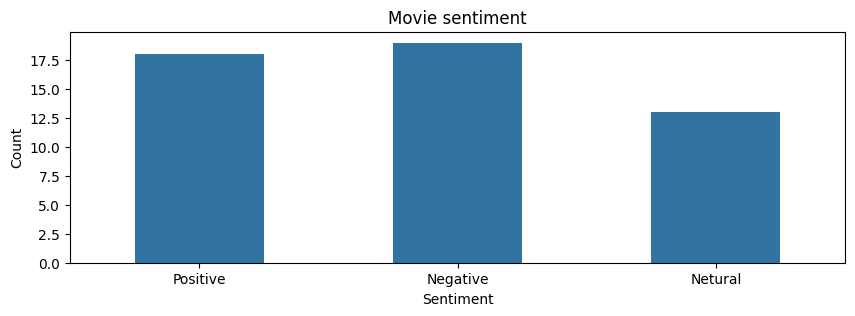

In [23]:
plt.figure(figsize=(10,3))
sns.countplot(data=df, x="Review Sentiment", width= 0.5)
plt.title("Movie sentiment Distrubution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show

In [ ]:

plt.figure(figsize=(10, 6))
sns.histplot(df["Rating"], kde=True, bins=10, color="blue")
plt.title("Movie Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

In [17]:

top_rated = df.groupby("Movie")["Rating"].mean().sort_values(ascending=False) 
print("\nTop Rated Movies:")
print(top_rated.head(5))

top_rated_df = top_rated.head(5).reset_index()


Top Rated Movies:
Movie
The Dark Knight    5.821755
Glory              5.536299
Peaky blinders     5.311041
3 idiots           5.271016
Avengers           5.037202
Name: Rating, dtype: float64


In [ ]:

plt.figure(figsize=(10, 5))
sns.barplot(data=top_rated_df, x="Movie", y="Rating")  
plt.title("Top 5 Highest Rated Movies")
plt.xlabel("Movie")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()

In [ ]:

# Review Count by Genre
plt.figure(figsize=(10, 5))
df.groupby("Genre")["Review Count"].sum().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#8dcfec','#235284','#46a2da','#58afdd','#3982b8']) 
plt.title("Review Count Distribution")
plt.ylabel('')  
plt.show()
